In [1]:
import sys
sys.path.append("../../")

# Import the data loader
%load_ext autoreload
%autoreload 2
import data_loading as dl
from importlib import reload
reload(dl)

from microfit import run_plotter as rp
from microfit import histogram as hist

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
run_numbers = [1,2,3]
rundata, weight, data_pot = dl.load_runs(run_numbers, 
                                         data="bnb",
                                         loadpi0variables=True,
                                         loadshowervariables=True,
                                         loadrecoveryvars=True,
                                         loadsystematics=True)

../../data_loading.py:1023: RuntimeWarning: overflow encountered in multiply
  mc_Q2 = -1 * (mc_q_E * mc_q_E - mc_q_px * mc_q_px - mc_q_py * mc_q_py - mc_q_pz * mc_q_pz)
../../data_loading.py:1023: RuntimeWarning: invalid value encountered in subtract
  mc_Q2 = -1 * (mc_q_E * mc_q_E - mc_q_px * mc_q_px - mc_q_py * mc_q_py - mc_q_pz * mc_q_pz)
../../data_loading.py:542: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(2 * e1 * e2 * (1 - px1 * px2 - py1 * py2 - pz1 * pz2))
../../data_loading.py:542: RuntimeWarning: overflow encountered in float_scalars
  return np.sqrt(2 * e1 * e2 * (1 - px1 * px2 - py1 * py2 - pz1 * pz2))
/uboone/app/users/cthorpe/Mambaforge/envs/python3LEE/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
../../data_loading.py:705: RuntimeWarning: invalid value encountered in true_divide
  df["proton_pz"] = np.where((mc_E_prot > 0), mc_pz_prot /

In [4]:
selection = "NPL"
preselection = "OneP"

from unblinding_far_sideband import *

query = f"{preselection_categories[preselection]['query']} and {selection_categories[selection]['query']}"
print(query)

all_predict = pd.concat([df for k, df in rundata.items() if k!='data']).query(query)


e_plot = np.linspace(0, 2.5, 100)
eff = []
pur = []
bkg_eff = []

is_sig = all_predict['category_1e1p'] == 12
tot_sig = np.sum(all_predict.loc[is_sig, 'weights'])
tot_bkg = np.sum(all_predict.loc[~is_sig, 'weights'])
tot_evt = np.sum(all_predict['weights'])
print('Total signal events:', tot_sig)
print('Total background events:', tot_bkg)
print('Total events:', tot_evt)
print(tot_sig+tot_bkg)


for e in e_plot:
    sig_below = np.sum(all_predict.loc[is_sig & (all_predict['reco_e'] < e), 'weights'])
    bkg_below = np.sum(all_predict.loc[~is_sig & (all_predict['reco_e'] < e), 'weights'])
    eff.append(sig_below/tot_sig)
    #pur.append(sig_below/tot_evt)
    pur.append(sig_below/(sig_below + bkg_below))
    bkg_eff.append(bkg_below/tot_bkg)
    

nslice == 1 and selected == 1 and shr_energy_tot_cali > 0.07 and ( (_opfilter_pe_beam > 0 and _opfilter_pe_veto < 20) or bnbdata == 1 or extdata == 1) and n_tracks_contained == 1 and n_showers_contained == 1 and nslice == 1 and selected == 1 and shr_energy_tot_cali > 0.07 and ( (_opfilter_pe_beam > 0 and _opfilter_pe_veto < 20) or bnbdata == 1 or extdata == 1) and n_tracks_contained > 0 and CosmicIPAll3D > 10. and trkpid < 0.02 and hits_ratio > 0.50 and shrmoliereavg < 9 and subcluster > 4 and trkfit < 0.65 and tksh_distance < 6.0 and (shr_tkfit_nhits_tot > 1 and shr_tkfit_dedx_max > 0.5 and shr_tkfit_dedx_max < 5.5) and tksh_angle > -0.9 and shr_trk_len < 300. and n_showers_contained == 1
Total signal events: 121.80585757983202
Total background events: 39.11721857371339
Total events: 160.92307615354542
160.92307615354542


/uboone/app/users/cthorpe/Mambaforge/envs/python3LEE/lib/python3.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in double_scalars


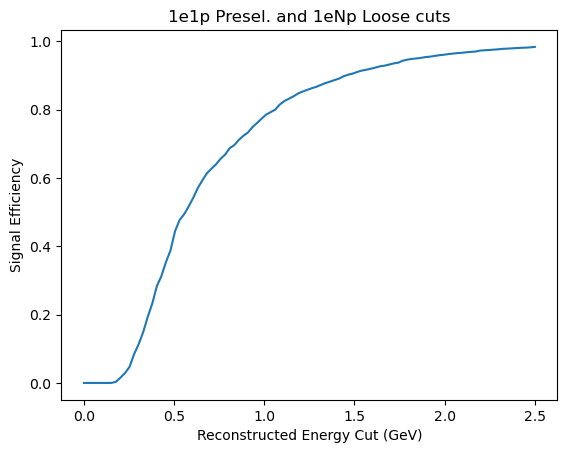

In [5]:
plt.plot(e_plot, eff)
plt.xlabel('Reconstructed Energy Cut (GeV)')
plt.ylabel('Signal Efficiency')
plt.title('1e1p Presel. and 1eNp Loose cuts')
plt.savefig('signal_efficiency.pdf', bbox_inches='tight')

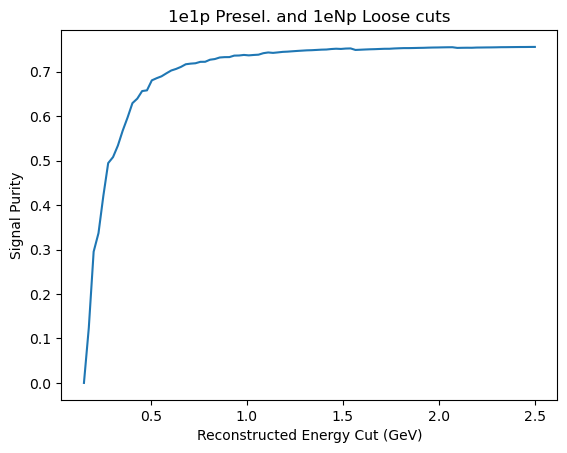

In [6]:
plt.plot(e_plot, pur)
plt.xlabel('Reconstructed Energy Cut (GeV)')
plt.ylabel('Signal Purity')
plt.title('1e1p Presel. and 1eNp Loose cuts')
plt.savefig('signal_purity.pdf', bbox_inches='tight')

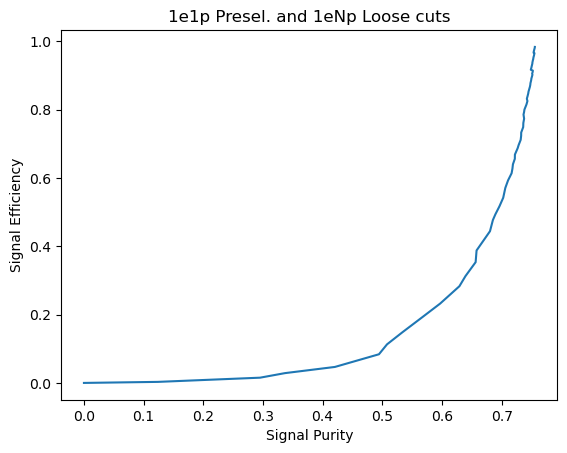

In [7]:
plt.plot(pur, eff)
plt.xlabel('Signal Purity')
plt.ylabel('Signal Efficiency')
plt.title('1e1p Presel. and 1eNp Loose cuts')
plt.savefig('purity_efficiency.pdf', bbox_inches='tight')

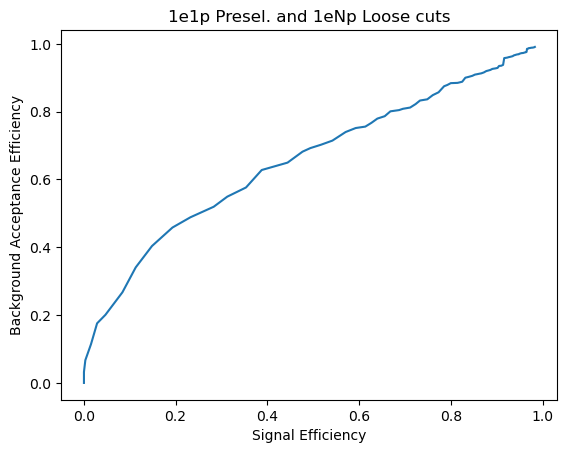

In [8]:
plt.plot(eff, bkg_eff)
plt.xlabel('Signal Efficiency')
plt.ylabel('Background Acceptance Efficiency')
plt.title('1e1p Presel. and 1eNp Loose cuts')
plt.savefig('roc.pdf', bbox_inches='tight')

<AxesSubplot:title={'center':'1eNp Presel. and 1eNp Loose cuts'}, xlabel='Reconstructed Energy [ GeV ]', ylabel='Events'>

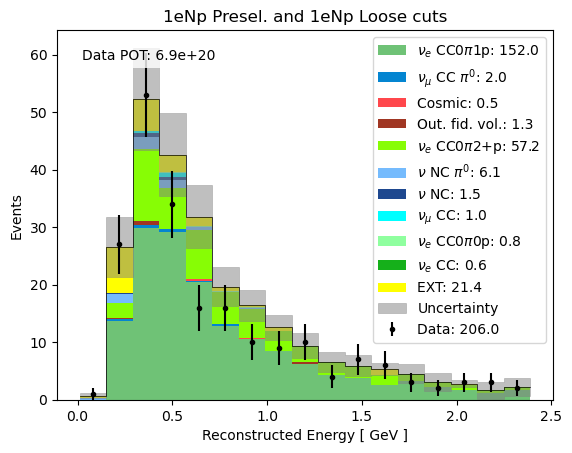

In [3]:
reload(rp)
reload(hist)


selection = "NPL"
preselection = "NP"

plotter = rp.Plotter(rundata, selection, preselection, variable="reco_e", data_pot=data_pot, weight_column="weights")
plotter.plot(category_column="category_1e1p", include_multisim_errors=True)
plt.savefig('1eNp_reco_e.pdf', bbox_inches='tight')

<AxesSubplot:title={'center':'1e1p Presel. and 1eNp Loose cuts'}, xlabel='Reconstructed Energy [ GeV ]', ylabel='Events'>

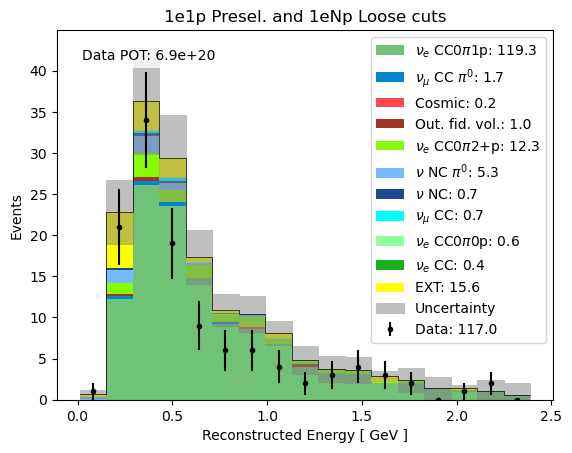

In [4]:
reload(rp)
reload(hist)


selection = "NPL"
preselection = "OneP"

plotter = rp.Plotter(rundata, selection, preselection, variable="reco_e", data_pot=data_pot, weight_column="weights")
plotter.plot(category_column="category_1e1p", include_multisim_errors=True)
plt.savefig('1e1p_reco_e.pdf', bbox_inches='tight')

In [12]:
from unblinding_far_sideband import *
import localSettings as ls
import plotter

In [13]:
RUN = 1
samples,weights,data_pot = dl.load_run(run_number=RUN,data="bnb",loadpi0variables=True, loadshowervariables=True, loadrecoveryvars=True,loadsystematics=True,load_lee=True)
pl = plotter.Plotter(samples,weights,data_pot)

../../data_loading.py:1015: RuntimeWarning: overflow encountered in multiply
  mc_Q2 = -1 * (mc_q_E * mc_q_E - mc_q_px * mc_q_px - mc_q_py * mc_q_py - mc_q_pz * mc_q_pz)
../../data_loading.py:1015: RuntimeWarning: invalid value encountered in subtract
  mc_Q2 = -1 * (mc_q_E * mc_q_E - mc_q_px * mc_q_px - mc_q_py * mc_q_py - mc_q_pz * mc_q_pz)
../../data_loading.py:534: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(2 * e1 * e2 * (1 - px1 * px2 - py1 * py2 - pz1 * pz2))
../../data_loading.py:534: RuntimeWarning: overflow encountered in float_scalars
  return np.sqrt(2 * e1 * e2 * (1 - px1 * px2 - py1 * py2 - pz1 * pz2))
../../data_loading.py:697: RuntimeWarning: invalid value encountered in true_divide
  df["proton_pz"] = np.where((mc_E_prot > 0), mc_pz_prot / mc_p_prot, np.nan)


Loading lee sample


../../plotter.py:290: UserWarning: Missing dirt sample
  warnings.warn("Missing dirt sample")


reco_e 18 (0.01, 2.5) Reconstructed Energy [ GeV ]


(0.0, 1092.2624597351553)

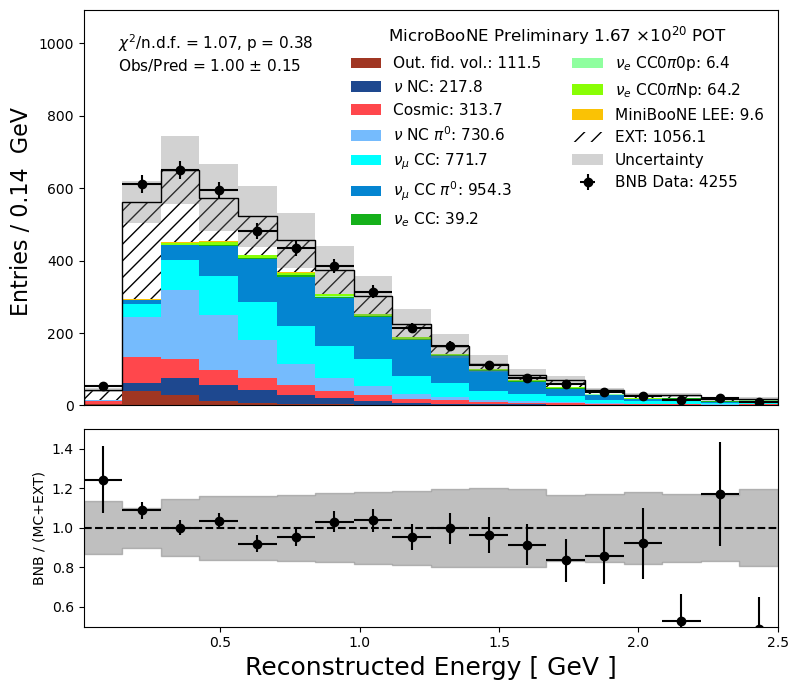

In [14]:
# choose sideband, preselection, and selection
# find defintions in unblinding_far_sideband.py
sdb_key = 'None' #'None'
pre_key = 'NP'
sel_key = 'None'
#sdb_key = 'TwoPShr'
#pre_key = 'NP'
#sel_key = 'NPBDTAllShr' #'None' 'NPVLAllShr' 'NPLAllShr' 'NPBDTAllShr' 'NPTAllShr'
run = RUN

sideband = sideband_categories[sdb_key]
preselection = preselection_categories[pre_key]
sel =  selection_categories[sel_key]

DETSYSPATH = ls.ntuple_path+'/detsys/{}_{}_{}/'.format(sideband['dir'], preselection['dir'], sel['dir'])
DETSYS = {'mc':False,'nue':False,'ccpi0':False,'ncpi0':False,'dirt':False,\
          'ncnopi':False,'nccpi':False,'ncpi0':False,'ccpi0':False}


QUERY = ""
for query in [sideband['query'],preselection['query'],sel['query']]:
    if query is None: continue
    if QUERY: QUERY += ' and '
    QUERY += query
    if run in [1, 2, 3, 12]:
        QUERY += f' and run{run}==True'

#QUERY += ' and (bnbdata==0 or reco_e>0.85)'
#QUERY += ' and (bnbdata==0)'
#print(QUERY)
        
#formatting can be improved..
TITLE = ""
#for text in [f'Run {run}',' - ',sideband['title'],' - ',preselection['title'],'\n',sel['title'],' - ',pi0scaling["title"]]:
#    if text is None: continue
#    TITLE += text

# Reproducing Alex's plot
VARIABLE, BINS, RANGE, XTIT = 'reco_e',18,(0.01, 2.50),r"Reconstructed Energy [ GeV ]"

print(VARIABLE, BINS, RANGE, XTIT)

fig, ax1, ax2 = pl.plot_variable(
    VARIABLE,   
    query=QUERY,
    kind="event_category",
    #kind="paper_category",
    draw_sys=True,
    detsysdict=DETSYS,
    DETSYSPATH=DETSYSPATH,
    COVMATRIX="",#'cov_matrix_Enu_reco_1eNp.txt',
    ratio=True,
    stacksort=3,
    title=XTIT,
    bins=BINS,
    range=RANGE,
    chisq=True,
    draw_data=True
    #asymErrs=True
)[0:3]

ax1.set_title(TITLE, loc='left')
ax1.set_ylim(0., ax1.get_ylim()[1]*1.4)